
## Outlines

- Data Wrangling
- Data Cleaning
- Visualizations

## Notes
- <span style="color:red">**PROVE ALL YOUR ANSWERS WITH GRAPHS IF AVAILABLE**.
- All problems **MUST** be solved.
- Read the problems well, before you start solving.
- The solution **MUST** pass all the test cases.
- Feel free to add more cells to develope the program, **BUT** make sure you gather them in ONE adequately working code cell.  

#### **Good Luck**

## <span style="color:blue">Problem statment

The content, tone, and format of job bulletins can influence the quality of the applicant pool. Overly-specific job requirements may discourage diversity. The Los Angeles Mayor’s Office wants to reimagine the city’s job bulletins by using text analysis to identify needed improvements.

The goal is to convert a folder full of plain-text job postings into a single structured CSV file and then to use this data to answer the questions provided below


## <span style="color:blue">Data Description

The job bulletins will be provided as a folder of plain-text files, one for each job classification.

Job Bulletins: 683 plain-text job postings

Instructions and Additional Documents:

- Job Bulletins with Annotations

- Annotation Descriptions.docx

- City Job Paths

- PDFs

- Description of promotions in job bulletins.docx

- Job_titles.csv

- Kaggle_data_dictionary.csv


### <span style="color:orange">Task 1

Create a descriptive csv file from the plain-text samples with the followoing columns:

- FILE_NAME: The bulletins file name.
- JOB_CLASS_TITLE: Job title.
- JOB_CLASS_NO: Job number.
- JOB_DUTIES: The duties of this job.
- EDUCATION_YEARS: Number of education yeras needed to apply for this job.
- SCHOOL_TYPE: The type of school you need to study in.
- EDUCATION_MAJOR: The eductaion major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job .
- FULL_TIME_PART_TIME: If the job is full time or part time or both.
- EXP_JOB_CLASS_TITLE: The title of the job you must have experience in before applying in this job.
- COURSE_COUNT: Number of courses neede to apply for this job.
- COURSE_LENGTH: The course length in years or months.
- COURSE_SUBJECT: The course subject tha is needed to be accepted in this job.
- DRIVERS_LICENSE_REQ: Is driver license required or not for this job.
- EXAM_TYPE: Type of exams neededin the hiring process.
- ENTRY_SALARY: Salary range in this job.
- OPEN_DATE: Date at it the job bulliten got open.
- REQUIREMENT_SET_TEXT: The requirments set need for this job in points.

In [150]:
import pandas as pd
import numpy as np # linear algebra
import re
import os
from datetime import datetime
from collections  import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
bulletins=os.listdir("C:/Users/abdal/Downloads/Data Analysis Project/cityofla/Job Bulletins")
additional=os.listdir("C:/Users/abdal/Downloads/Data Analysis Project/cityofla/Additional data")
csvfiles=[]
for file in additional:
    if file.endswith('.csv'):
        print(file)
        csvfiles.append("C:/Users/abdal/Downloads/Data Analysis Project/cityofla/Additional data/"+file)

job_titles .csv
kaggle_data_dictionary - output_fields.csv


In [152]:
def to_dataframe(num,df):
    """"function to extract features from job bulletin text files and convert to
    pandas dataframe.
    function take two arguments 
                        1.the number of files to be read
                        2.dataframe object                                      """
    

    
    opendate=re.compile(r'(Open [D,d]ate:)(\s+)(\d+-\d+-\d+)')       #match open date
    
    salary=re.compile(r'\$(\d+,\d+)')       #match salary
    
    requirements=re.compile(r'(REQUIREMENTS?/\s?MINIMUM QUALIFICATIONS?)(.*)(PROCESS NOTE)')      #match requirements
    notes = re.compile(r'(NOTES|PROCESS NOTES)(.*)(WHERE TO APPLY)')
    ex = re.compile(r"(INTERDEPARTMENTAL PROMOTIONAL AND (AN )?OPEN COMPETITI?VE BASIS)(.*)(AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER)")
    ex1 = re.compile(r"(INTERDEPART?MENTAL PROMOTIONAL BASIS)(.*)(AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER)")
    ex2 = re.compile(r"(OPEN COMPETITIVE BASIS)(.*)(AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER)")
    
    
    for no in range(0,num):
        with open("C:/Users/abdal/Downloads/Data Analysis Project/cityofla/Job Bulletins/"+bulletins[no],encoding="ISO-8859-1") as f:         #reading files 
                try:
                    file=f.read().replace('\t','')
                    data=file.replace('\n','')
                    headings=[heading for heading in file.split('\n') if heading.isupper()]             ##getting heading from job bulletin

                    try:
                        sal = re.findall(salary,data)
                    except:
                        sal = np.nan
                     
                        
                    
                    try:
                        date=datetime.strptime(re.search(opendate,data).group(3),'%m-%d-%y')
                    except NameError:
                        date=datetime.strptime(re.search(opendate,data).group(3),'%m-%d-%Y')
                    except:
                        date = np.nan
                        
                        
                    try:
                        req=re.search(requirements,data).group(2)
                    except Exception as e:
                        try:
                            req=re.search('(.*)NOTES?',re.findall(r'(REQUIREMENTS?)(.*)(NOTES?)',
                                                              data)[0][1]).group(1)
                        except Exception as e:
                            try:
                                req=re.search('(.*)SELECTIVE CERTIFICATION?',re.findall(r'(REQUIREMENTS?)(.*)',
                                                              data)[0][1]).group(1)
                            except Exception as e:
                                try:
                                    req=re.search('(.*)PROCESS NOTES',re.findall(r'(REQUIREMENTS/MINIMUM QUALIFICATIONS?)(.*)',data)[0][1]).group(1)
                                except Exception as e:
                                    try:
                                        req=re.search('(.*)PROCESS NOTES',re.findall(r'(REQUIREMENTS/MINIMUM QUALIFICATIONS?)(.*)',data)[0][1]).group(1)
                                    except Exception as e:
                                        pass
                        
                    
                    try:
                        duties=re.search(r'(DUTIES)(.*)(REQ[A-Z])',data).group(2)
                    except:
                        duties = np.nan
                        
                    try:
                        note = re.search(notes,data).group(2) 
                    
                    except Exception as e:
                        try:
                            note=re.search('(.*)WHERE TO APPLY?',re.findall(r'(PROCESS NOTES|NOTES?)(.*)',
                                                              data)[0][1]).group(1)  
                        except Exception as e:
                            try:
                                note = re.search('(.*)JOB BENEFITS:',re.findall('(NOTES:?)(.*)',
                                          data)[0][1]).group(1)
                            except Exception as e:
                                pass
                            
                
                    
                    try:
                        a = re.search(ex,data).group(1)
                    except:
                        try:
                            a = re.search(ex1,data).group(1)
                        except:
                            try:
                                a = re.search(ex2,data).group(1)
                            except:
                                pass
                    
                    
                    
                    
                    
                    
                    
                  
                    
                    df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
                               "OPEN_DATE":date,"REQUIREMENTS":req,'DUTIES':duties
                                ,'EXAM_TYPE':a,'notes':note},ignore_index=True)
                    
                    
                    reg=re.compile(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)\s(years?)\s(of\sfull(-|\s)time)')
                    df['EXPERIENCE_LENGTH']=df['REQUIREMENTS'].apply(lambda x :  re.search(reg,x).group(1).lower() if re.search(reg,x) is not None  else 'zero')
                    df['FULL_TIME_PART_TIME'] = np.nan
                    df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
                    df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('part-time')] = 'PART TIME'
                    df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full time')] = 'FULL TIME'
                    df['FULL_TIME_PART_TIME'].fillna('_',inplace = True)
                    reg=re.compile(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)(\s|-)(years?)\s(college)')
                    df['EDUCATION_YEARS']=df['REQUIREMENTS'].apply(lambda x :  re.search(reg,x).group(1) if re.search(reg,x) is not None  else 'zero')
                    df['SCHOOL_TYPE'] = np.nan
                    df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
                    df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or university')] = 'college or university'
                    df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('apprenticeship')] = 'Apprenticeship'
                    df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('Apprenticeship')] = 'Apprenticeship'
                    df['SCHOOL_TYPE'].fillna('No School Type',inplace=True)
                    df['DRIVERS_LICENSE_REQ'] = np.nan
                    df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
                    df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("may require a valid California driver's license")] = 'M'
                    df['DRIVERS_LICENSE_REQ'].fillna('N',inplace=True)
                    
                    
                    
                except Exception as e:
                    print('umatched sequence',no)
                    
                    
                
                
        
           
    return df

In [153]:
df=pd.DataFrame(columns=['FILE_NAME','POSITION','salary_start','OPEN_DATE','REQUIREMENTS','DUTIES'])
df=to_dataframe(len(bulletins),df)
df.to_csv('Abdallah Odeh.csv')

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

umatched sequence 172


C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\3797835384.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [154]:
df['EXAM_TYPE'] = df['EXAM_TYPE'].replace('INTERDEPARTMENTAL PROMOTIONAL AND AN OPEN COMPETITIVE BASIS','OPEN_INT_PROM')
df['EXAM_TYPE'] = df['EXAM_TYPE'].replace('INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITIVE BASIS','OPEN_INT_PROM')
df['EXAM_TYPE'] = df['EXAM_TYPE'].replace('INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITVE BASIS','OPEN_INT_PROM')
df['EXAM_TYPE'] = df['EXAM_TYPE'].replace('INTERDEPARTMENTAL PROMOTIONAL BASIS','INT_DEPT_PROM')
df['EXAM_TYPE'] = df['EXAM_TYPE'].replace('INTERDEPARMENTAL PROMOTIONAL BASIS','INT_DEPT_PROM')
df['EXAM_TYPE'] = df['EXAM_TYPE'].replace('OPEN COMPETITIVE BASIS','OPEN')

In [155]:
df['avg_salary'] = 0

for i in range(0,len(df['salary_start'])):
    ss = 0
    for y in range(0,len(df['salary_start'][i])):
        
        ss += float(df['salary_start'][i][y].replace(',',''))
        
        df['avg_salary'].iloc[i] = int(ss / len(df['salary_start'][i]))
    

C:\Users\abdal\AppData\Local\Temp\ipykernel_9060\2729924699.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_salary'].iloc[i] = int(ss / len(df['salary_start'][i]))


In [156]:
df = df.drop('salary_start',axis=1)

In [157]:
df['EDUCATION_YEARS'] = df['EDUCATION_YEARS'].replace('zero',0)
df['EDUCATION_YEARS'] = df['EDUCATION_YEARS'].replace('four',4)

In [159]:
df['EXPERIENCE_LENGTH'] = df['EXPERIENCE_LENGTH'].replace('zero',0)
df['EXPERIENCE_LENGTH'] = df['EXPERIENCE_LENGTH'].replace('one',1)
df['EXPERIENCE_LENGTH'] = df['EXPERIENCE_LENGTH'].replace('two',2)
df['EXPERIENCE_LENGTH'] = df['EXPERIENCE_LENGTH'].replace('three',3)
df['EXPERIENCE_LENGTH'] = df['EXPERIENCE_LENGTH'].replace('four',4)
df['EXPERIENCE_LENGTH'] = df['EXPERIENCE_LENGTH'].replace('five',5)
df['EXPERIENCE_LENGTH'] = df['EXPERIENCE_LENGTH'].replace('six',6)
df['EXPERIENCE_LENGTH'] = df['EXPERIENCE_LENGTH'].replace('seven',7)

### <span style="color:orange">Task 2

Assume you are a DA in a company and you are about to prepare a report to the LA governate about there jobs, by answering some questions and give insight about the data provided.

### Note: This section will be a QA cells.

### <span style="color:brown">Q1:

A non-experienced job seeker wants to know what is the best job for him?

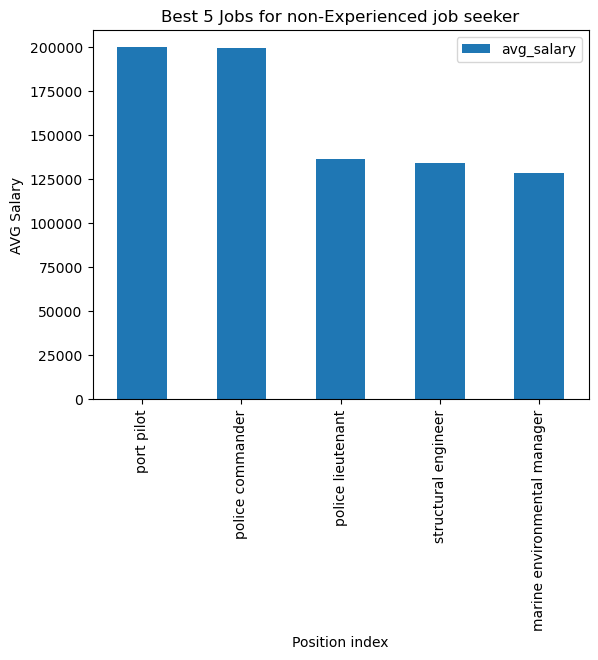

In [161]:
df[df['EXPERIENCE_LENGTH'] == 0][['POSITION','avg_salary']].sort_values(['avg_salary','POSITION'],ascending=False).head().plot.bar()
plt.xlabel("Position index")
plt.ylabel("AVG Salary")
plt.title("Best 5 Jobs for non-Experienced job seeker")
p = ['port pilot','police commander','police lieutenant','structural engineer','marine environmental manager']
x = [0,1,2,3,4]
plt.xticks(x,p)
plt.show()


### <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?

## i suggested that the null values in (SCHOOL TYPE) is equal to 'no school type'

<AxesSubplot:>

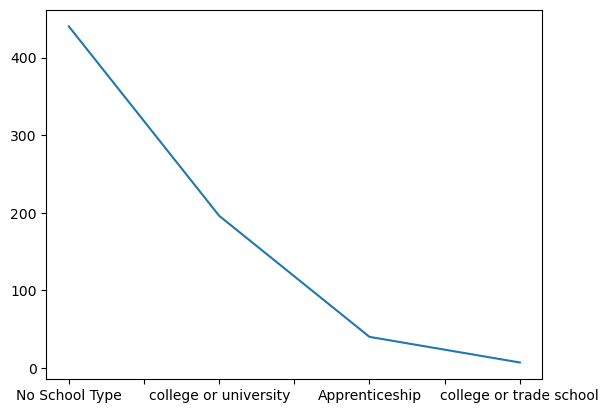

In [162]:
df['SCHOOL_TYPE'].value_counts().plot()

### in the plot we see that the majority for no school but if i drop the 'no school' type we will get 'college or university' is the best for the parents child

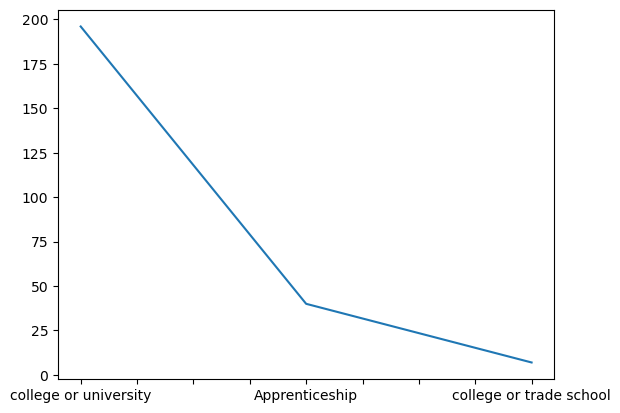

In [163]:
a = df['SCHOOL_TYPE'] 
a = a[a != 'No School Type'].value_counts().plot()


### <span style="color:brown">Q3:

What the best time in the year to be ready for a job applying in any experience level?

<AxesSubplot:>

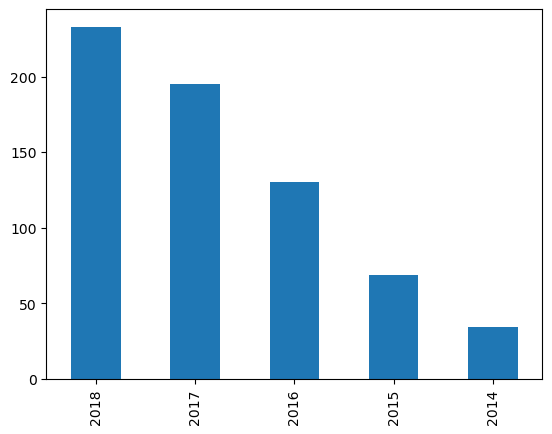

In [171]:
year = df['OPEN_DATE'].dt.year 
year = year.fillna(0)
year = year.astype(int)
year.value_counts().head().plot.bar()


### <span style="color:brown">Q4:

Is experience more important than educational level?

<AxesSubplot:xlabel='EXPERIENCE_LENGTH', ylabel='count'>

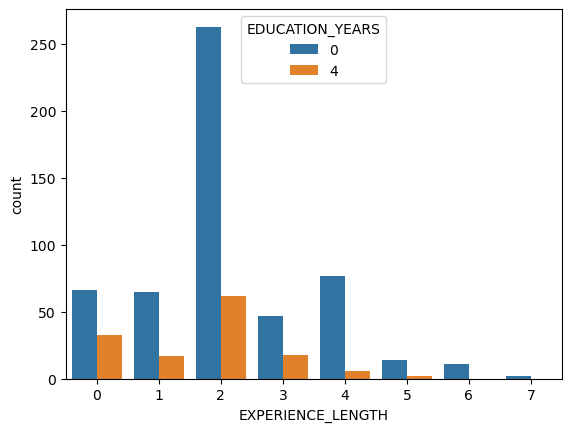

In [172]:
df['REQUIREMENTS'].str.contains('REQUIREMENTS').sum()
df['REQUIREMENTS'].str.contains('college or university').sum()
sns.countplot(data = df,x='EXPERIENCE_LENGTH',hue='EDUCATION_YEARS')

### <span style="color:brown">Q5:

Which fresh grade job that will guarantee many job offers in the future for him?

C:\Users\abdal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


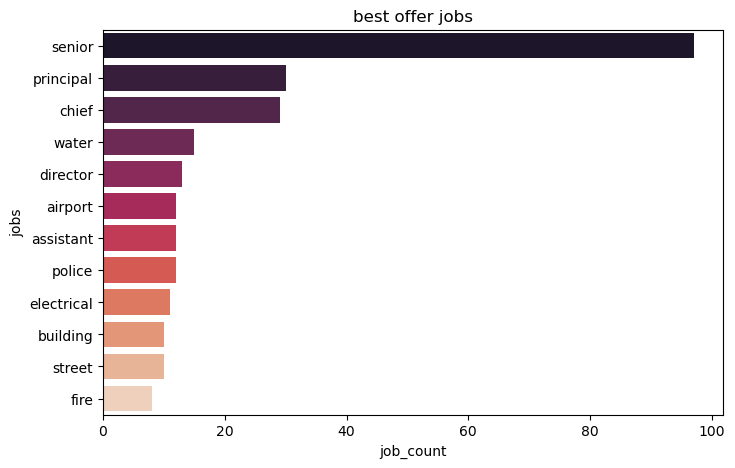

In [173]:
a = []
for i in range(0,len(df['POSITION'])):
    a.append(df['POSITION'][i].split()[0])

plt.figure(figsize=(8,5))
aa = Counter(a)
q = aa.most_common(12)
x,b=map(list, zip(*q))
sns.barplot(b,x,palette='rocket') 
plt.title('best offer jobs')
plt.xlabel("job_count")
plt.ylabel('jobs')
plt.show()    

### <span style="color:brown">Q6:

"The City of Los Angeles does not discriminate on the basis of race, religion, national origin, sex, age, marital status, sexual orientation, gender identity, gender expression, disability, creed, color, ancestry, medical condition (cancer), or Acquired Immune Deficiency Syndrome.

AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER 
"

The above statment is qouted from one of the job descriptions.

Based on the jobs requirments you structred above do you think that LA governate may bais a little for men over women or the applicant marital status for example may effect his chance to gain the job?

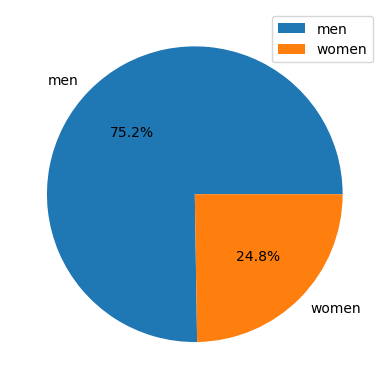

In [174]:
men = ['strong','lead','leaders','analysis','analyze','analytical','individual',
'individuals','decisions','driven','competitive','expert','objectives'
,'principles','Active','Ambitious','Aggressive','Superior','Independent','Determined',
'analy','assert','battle','decision','force','greedy','opinion','honor','fulfill','space','plan','self confiden'
,'domina','logic','superior','outspoken','champion','stubborn','capable','support','active' 
'adventurous', 'aggressive', 'ambitious','ambition','analytical','assertive','autonomous','decisive','determined', 
'dominant','dominating','independent','lead','ninja','objective','outspoken','rock star','superior','he','his','him','himself']

women = ['support','share','responsible','understanding','together','committed',
'interpersonal','feel','collaborate','collaboration','connect','depend','honest','yield','enthusias',
'compassion','kind','pleasant','polite','warm','cheer','kinship','pleasant','polite','share','quiet','respect','love'
,'devotion','talking','life','nurture ','healing','sensitiv','pleasant','caring','cooperat','inter dependen','communal','relationships',
'commit' ,'connect','considerate','cooperate','depend','honest','interpersonal','loyal','pleasant','polite','responsible',
'support ','together','trust','understand','kind','modesty','empath','she','her','herself','respone','receive','communication','life','validation','community']

aa = []
aa = ''.join(df['REQUIREMENTS'])
aa = aa.split()
aa = [i.lower() for i in aa]

output = {}
for word in men:
    output[word] = df['REQUIREMENTS'].str.contains(word).sum()
    
man = sum(output.values())

output = {}
for word in women:
    output[word] = df['REQUIREMENTS'].str.contains(word).sum()
    
woman = sum(output.values())
qqq = ['men','women']
ww = [man,woman]
plt.pie(ww,labels=qqq, autopct = '%1.1f%%')
plt.legend()
plt.show()

### <span style="color:brown">Q7:

The city need an advice based on your analysis, build a new schools for more fresh non-experienced workers or encorge the work environment to help the workers to get promotions?

<AxesSubplot:ylabel='EXPERIENCE_LENGTH'>

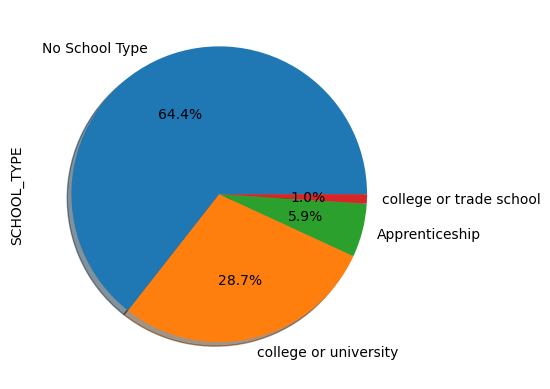

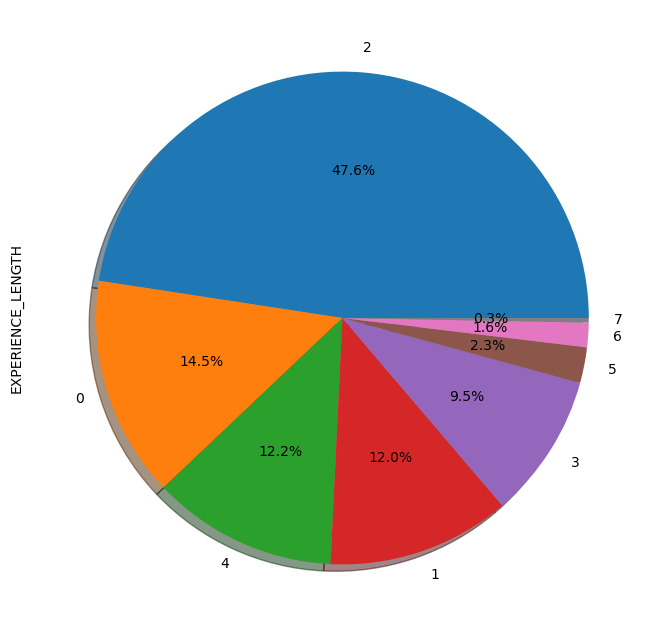

In [175]:
df['SCHOOL_TYPE'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.figure(figsize=(11,8))
df['EXPERIENCE_LENGTH'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

### <span style="color:brown">Q8:

What is the average salary for worker with a driver licence?

<AxesSubplot:xlabel='DRIVERS_LICENSE_REQ'>

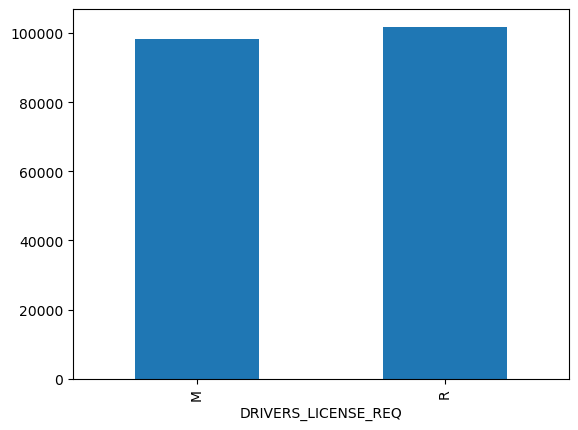

In [200]:
a = df[['avg_salary','DRIVERS_LICENSE_REQ']]
a = a[a['DRIVERS_LICENSE_REQ'] != 'N']
a.groupby(['DRIVERS_LICENSE_REQ'])['avg_salary'].mean().plot.bar()

## <span style="color:brown">Q9:

list the most feature that effect the salary of the worker.

<AxesSubplot:xlabel='DRIVERS_LICENSE_REQ'>

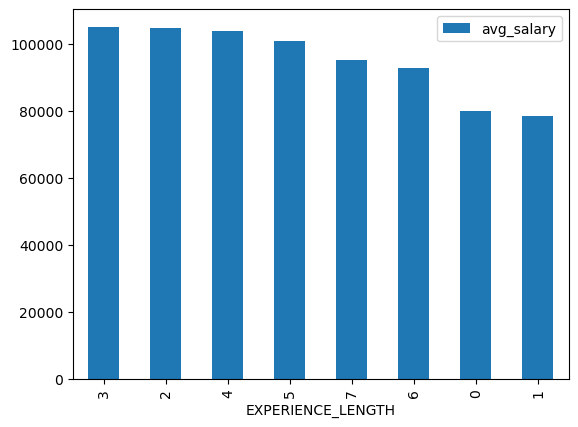

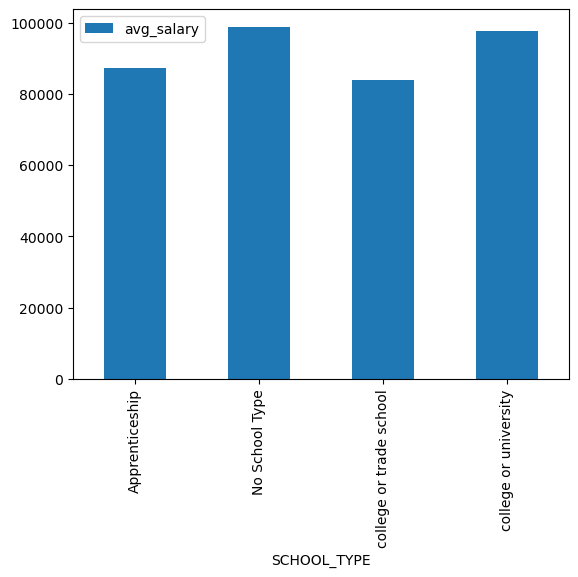

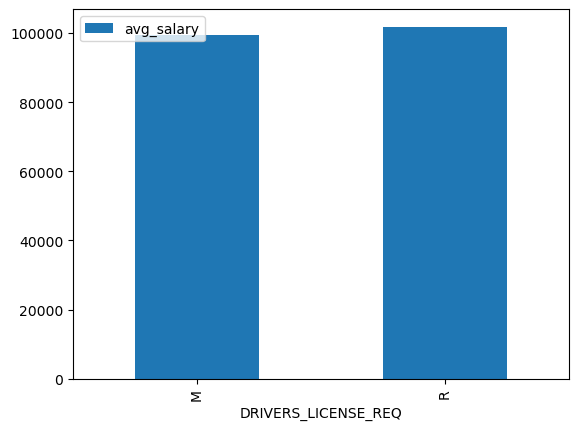

In [179]:
### Write you code here ###
df1 = df[['avg_salary','EXPERIENCE_LENGTH']]
df1.groupby(['EXPERIENCE_LENGTH']).mean().sort_values(by='avg_salary',ascending=False).plot.bar()
###
df1 = df[['avg_salary','SCHOOL_TYPE']]
df1.groupby(['SCHOOL_TYPE']).mean().plot.bar()
###
df1 = df[['avg_salary','EDUCATION_YEARS']]
df1.groupby(['EDUCATION_YEARS']).mean().plot.bar()
###
df1 = df[['avg_salary','FULL_TIME_PART_TIME']]
df1 = df1[df1['FULL_TIME_PART_TIME'] !='_']
df1.groupby(['FULL_TIME_PART_TIME'])['avg_salary'].mean().plot.bar()


df1 = df[['avg_salary','DRIVERS_LICENSE_REQ']]
df1 = df1[df1['DRIVERS_LICENSE_REQ'] !='N']
df1.groupby(['DRIVERS_LICENSE_REQ'])['avg_salary'].mean().plot.bar()

## <span style="color:brown">Q10:

Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

##most jobs require 2 years of experiance about 47% of these jobs require 2years of expereiance 
##most education years (80%) are equal to zero 
##as the years increase the demand of jobs increases 
### the average of the salary of jobs is (97641.27)


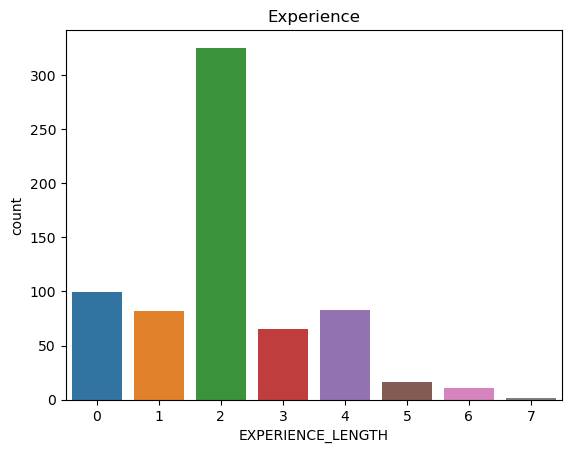

In [180]:
sns.countplot(data=df,x='EXPERIENCE_LENGTH')
plt.title('Experience')
plt.show()

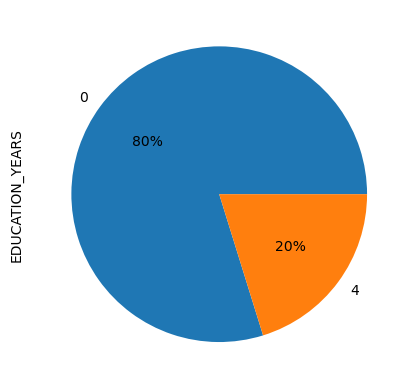

In [181]:
df['EDUCATION_YEARS'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

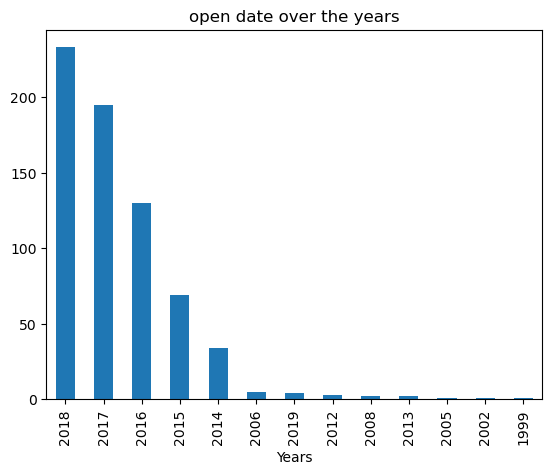

In [183]:
a  = year
a = a[a != 0]
a.value_counts().plot.bar()
plt.xlabel('Years')
plt.title('open date over the years')
plt.show()

<AxesSubplot:ylabel='avg_salary'>

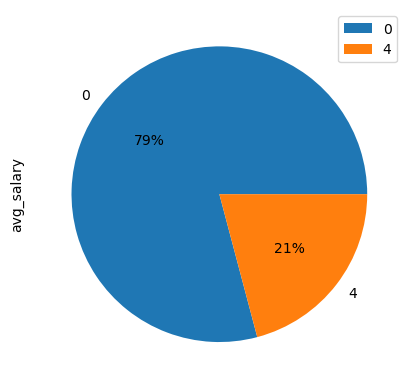

In [184]:
df.groupby('EDUCATION_YEARS').sum().plot(kind='pie',y='avg_salary',autopct='%1.0f%%')

<AxesSubplot:xlabel='EXPERIENCE_LENGTH'>

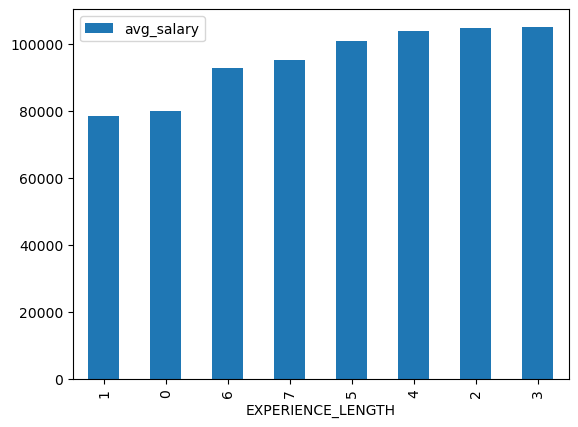

In [185]:
df[['EXPERIENCE_LENGTH','avg_salary']].groupby('EXPERIENCE_LENGTH').mean().sort_values(by='avg_salary').plot.bar()

array([<AxesSubplot:ylabel='avg_salary'>], dtype=object)

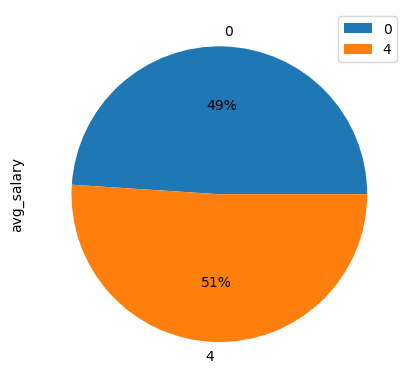

In [186]:
df[['EDUCATION_YEARS','avg_salary']].groupby('EDUCATION_YEARS').mean().sort_values(by='avg_salary').plot.pie(subplots=True,autopct='%1.0f%%')

<AxesSubplot:xlabel='Year'>

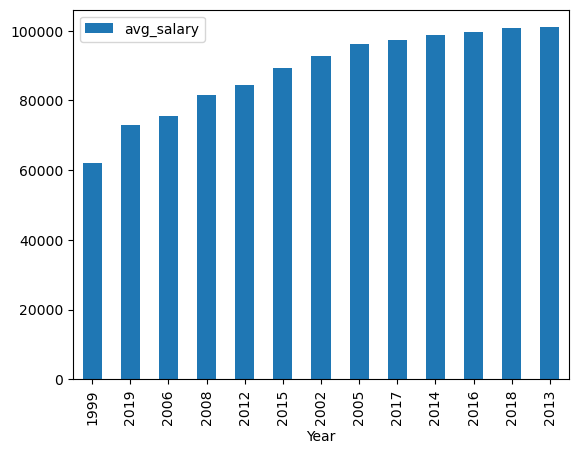

In [188]:
df['Year'] = year
a = df[['Year','avg_salary']]
a = a[a['Year'] != 0]

a.groupby('Year').mean().sort_values(by='avg_salary').plot.bar()

## <span style="color:brown">Q11:

Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.


<AxesSubplot:ylabel='EXAM_TYPE'>

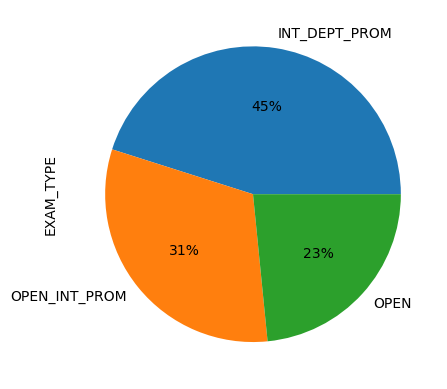

In [189]:
df['EXAM_TYPE'].value_counts().plot.pie(autopct='%1.0f%%')

<AxesSubplot:ylabel='FULL_TIME_PART_TIME'>

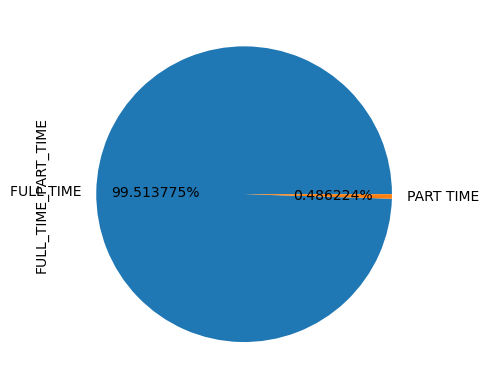

In [190]:
a = df['FULL_TIME_PART_TIME']
a[a != '_'].value_counts().plot.pie(autopct='%1f%%')

<AxesSubplot:ylabel='SCHOOL_TYPE'>

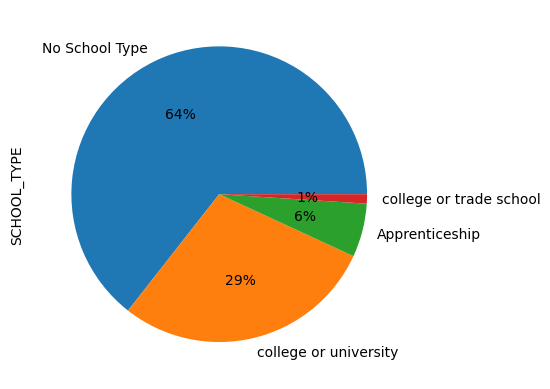

In [191]:
df['SCHOOL_TYPE'].value_counts().plot.pie(autopct='%1.0f%%')

<AxesSubplot:ylabel='DRIVERS_LICENSE_REQ'>

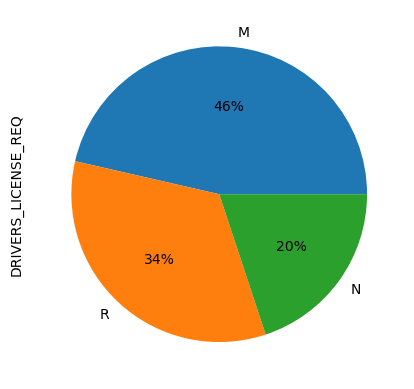

In [192]:
df['DRIVERS_LICENSE_REQ'].value_counts().plot.pie(autopct='%1.0f%%')

<AxesSubplot:ylabel='avg_salary'>

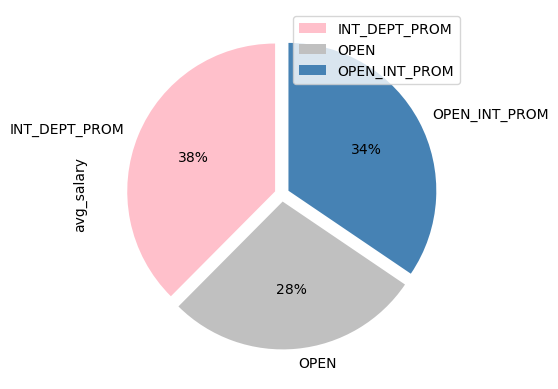

In [193]:
colors = ['pink', 'silver', 'steelblue']
explode = (0.05, 0.05, 0.05)
a = df[['EXAM_TYPE','avg_salary']]
a.groupby('EXAM_TYPE').mean().plot.pie(y='avg_salary',autopct='%1.0f%%',colors=colors,explode=explode,startangle=90)

<AxesSubplot:ylabel='avg_salary'>

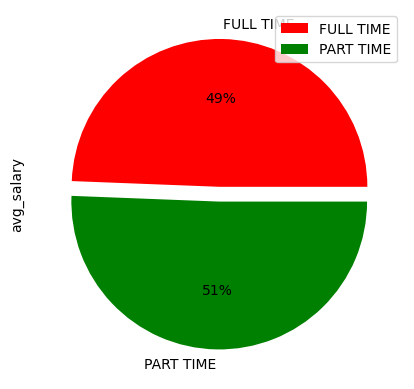

In [194]:
a = df[['FULL_TIME_PART_TIME','avg_salary']]
a = a[a['FULL_TIME_PART_TIME'] != '_']
explode = (0.05, 0.05)
c = ['red','green']
a.groupby('FULL_TIME_PART_TIME').mean().plot.pie(y='avg_salary',autopct='%1.0f%%',explode=explode,colors=c)

<AxesSubplot:ylabel='avg_salary'>

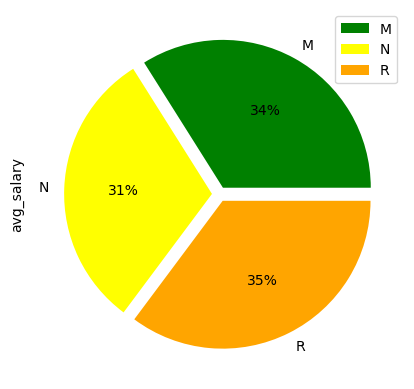

In [195]:
a = df[['DRIVERS_LICENSE_REQ','avg_salary']]
e = (0.05,0.05,0.05)
a.groupby('DRIVERS_LICENSE_REQ').mean().plot.pie(y='avg_salary',autopct='%1.0f%%',explode=e,colors=['green','yellow','orange'])

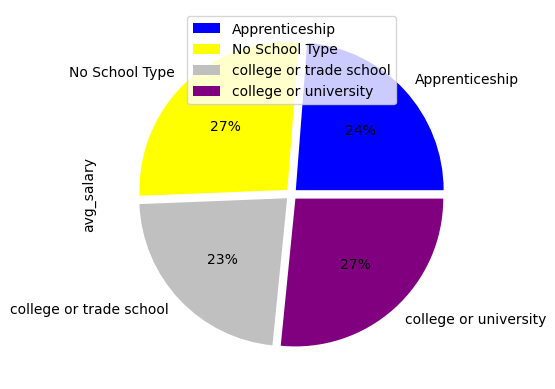

In [196]:
a = df[['SCHOOL_TYPE','avg_salary']]
a.groupby('SCHOOL_TYPE').mean().plot.pie(y='avg_salary',autopct='%1.0f%%',explode=[0.04,0.04,0.04,0.04],colors=['blue','yellow','silver','purple'])
plt.legend(loc='upper center')

## Great Job.